## CNN with 99% accuracy

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import load_model, save_model
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [ ]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()
x_train, x_test = x_train/255, x_test/255

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
ndata_train = x_train.shape[0]
ndata_test = x_test.shape[0]

In [ ]:
x_train = x_train.reshape((ndata_train,28,28,1))
x_test = x_test.reshape((ndata_test,28,28,1))

xshape = x_train.shape[1:4]
xshape

(28, 28, 1)

In [ ]:
# CNN model

cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=xshape))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))  # Dropout layer to prevent overfitting
cnn_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))  # Another dropout layer
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))  # Dropout layer before the output layer
cnn_model.add(Dense(10, activation='softmax'))

In [ ]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

## Training the model on 80% of the training data

In [ ]:
history = cnn_model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 12s 9ms/step - loss: 0.4230 - accuracy: 0.8667 - val_loss: 0.0897 - val_accuracy: 0.9726
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1357 - accuracy: 0.9587 - val_loss: 0.0607 - val_accuracy: 0.9822
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 0.1029 - accuracy: 0.9688 - val_loss: 0.0482 - val_accuracy: 0.9868
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0853 - accuracy: 0.9746 - val_loss: 0.0434 - val_accuracy: 0.9869
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0752 - accuracy: 0.9771 - val_loss: 0.0403 - val_accuracy: 0.9885
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0670 - accuracy: 0.9796 - val_loss: 0.0397 - val_accuracy: 0.9888
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0619 - accuracy: 0.9812 - val_loss: 0.0381 - val_accuracy: 0.9892
Epoch

In [ ]:
print('This model predicts '+str(cnn_model.evaluate(x_test,y_test)[1]*100) +'% of the test data correctly')

313/313 [==============================] - 1s 3ms/step - loss: 0.0220 - accuracy: 0.9933
This model predicts 99.33000206947327% of the test data correctly


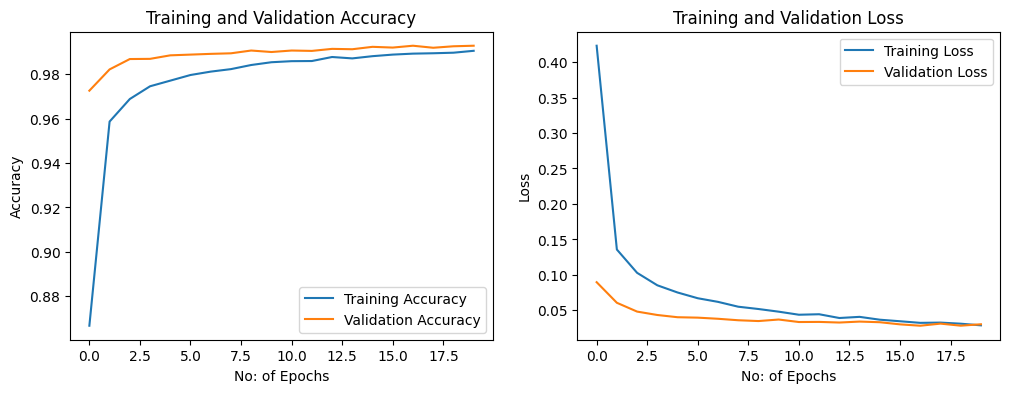

In [ ]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('No: of Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('No: of Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Retraining model on complete train dataset based on the parameters tuned before

In [ ]:
cnn_model.fit(x_train,y_train,epochs=20,validation_split=0,batch_size=128)

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0383 - accuracy: 0.9884
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0324 - accuracy: 0.9897
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0300 - accuracy: 0.9910
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0305 - accuracy: 0.9905
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0276 - accuracy: 0.9918
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0289 - accuracy: 0.9909
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0258 - accuracy: 0.9916
Epoch 8/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0269 - accuracy: 0.9915
Epoch 9/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0248 - accuracy: 0.9919
Epoch 10/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0234 - accuracy: 0.9923

In [ ]:
print('This model predicts '+str(cnn_model.evaluate(x_test,y_test)[1]*100) +'% of the test data correctly')

313/313 [==============================] - 1s 2ms/step - loss: 0.0222 - accuracy: 0.9928
This model predicts 99.27999973297119% of the test data correctly


In [ ]:
#saving the model
cnn_model.save('cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#Reusing the stored model to predict
cnn_model = load_model('cnn_model.h5')

print('This model predicts '+str(cnn_model.evaluate(x_test,y_test)[1]*100) +'% of the test data correctly')

313/313 [==============================] - 1s 3ms/step - loss: 0.0222 - accuracy: 0.9928
This model predicts 99.27999973297119% of the test data correctly


In [ ]:
# Misclassification
predict = cnn_model.predict(x_test)
pred_class = np.argmax(predict,axis=1)
misclassified_sample = np.where(pred_class != y_test)[0]
print("No: of misclassified samples is: ",len(misclassified_sample))

313/313 [==============================] - 1s 2ms/step
No: of misclassified samples is:  72


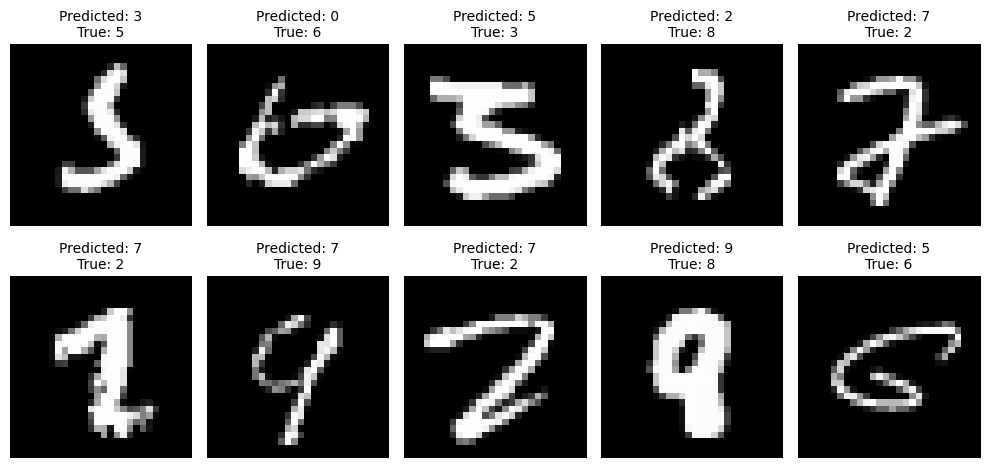

In [ ]:
# plotting some misclassified samples
plt.figure(figsize=(10, 5))
for i, idx in enumerate(misclassified_sample[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    pred_label = np.argmax(predict[idx])
    true_label = y_test[idx]
    plt.title(f"Predicted: {pred_label}\nTrue: {true_label}", fontsize=10, pad=5)
    plt.axis('off')
plt.tight_layout()
plt.show()

## Transformer

In [ ]:
import numpy as np
import tensorflow as tf
import pickle

In [ ]:
# this is written as a tensorflow "layer".  it's just a vector the same size as the
# output of the previous layer. the vector is initialized randomly, but we'll use
# gradient descent to update the values in the vector
#
# it's purpose is to be appended to the beginning of the sequence of vectors fed into
# the transformer.  then after the transformer runs on the whole data, we just grab
# the resulting zero-th vector...the class token...and use that as the portfolio weights
class ClassToken(tf.keras.layers.Layer):
    def __init__(self,**kwargs):
        super().__init__()

    def build(self, input_shape):
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(
            initial_value = w_init(shape=(1, 1, input_shape[-1]), dtype=tf.float32),
            trainable = True
        )

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        hidden_dim = self.w.shape[-1]

        cls = tf.broadcast_to(self.w, [batch_size, 1, hidden_dim])
        cls = tf.cast(cls, dtype=inputs.dtype)
        return cls

In [ ]:
def build_ViT(n,m,block_size,hidden_dim,num_layers,num_heads,key_dim,mlp_dim,dropout_rate,num_classes):
    # n is number of rows of blocks
    # m is number of cols of blocks
    # block_size is number of pixels (with rgb) in each block

    inp = tf.keras.layers.Input(shape=(n*m,block_size))
    inp2 = tf.keras.layers.Input(shape=(n*m))
    mid = tf.keras.layers.Dense(hidden_dim)(inp) # transform to vectors with different dimension
    # the positional embeddings
#     positions = tf.range(start=0, limit=n*m, delta=1)
    emb = tf.keras.layers.Embedding(input_dim=n*m, output_dim=hidden_dim)(inp2) # learned positional embedding for each of the n*m possible possitions
    mid = mid + emb # for some reason, tf.keras.layers.Add causes an error, but + doesn't?
    # create and append class token to beginning of all input vectors
    token = ClassToken()(mid) # append class token to beginning of sequence
    mid = tf.keras.layers.Concatenate(axis=1)([token, mid])

    for l in range(num_layers): # how many Transformer Head layers are there?
        ln  = tf.keras.layers.LayerNormalization()(mid) # normalize
        mha = tf.keras.layers.MultiHeadAttention(num_heads=num_heads,key_dim=key_dim,value_dim=key_dim)(ln,ln,ln) # self attention!
        add = tf.keras.layers.Add()([mid,mha]) # add and norm
        ln  = tf.keras.layers.LayerNormalization()(add)
        den = tf.keras.layers.Dense(mlp_dim,activation='relu')(ln) # maybe should be relu...who knows...
        den = tf.keras.layers.Dropout(dropout_rate)(den) # regularization
        den = tf.keras.layers.Dense(hidden_dim)(den) # back to the right dimensional space
        den = tf.keras.layers.Dropout(dropout_rate)(den)
        mid = tf.keras.layers.Add()([den,add]) # add and norm again
    ln = tf.keras.layers.LayerNormalization()(mid)
    fl = ln[:,0,:] # just grab the class token for each image in batch
    clas = tf.keras.layers.Dense(num_classes,activation='softmax')(fl) # probability that the image is in each category
    mod = tf.keras.models.Model([inp,inp2],clas)
    mod.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return mod

In [ ]:
#Initializing vision transformer
n = 4
m = 4
block_size = 49
hidden_dim = 100
num_layers = 8
num_heads = 8
key_dim = hidden_dim//num_heads # usually good practice for key_dim to be hidden_dim//num_heads...this is why we do Multi-Head attention
mlp_dim = hidden_dim
dropout_rate = 0.07
num_classes = 10



trans = build_ViT(n,m,block_size,hidden_dim,num_layers,num_heads,key_dim,mlp_dim,dropout_rate,num_classes)
trans.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 16, 49)]             0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 16)]                 0         []                            
                                                                                                  
 dense_2 (Dense)             (None, 16, 100)              5000      ['input_1[0][0]']             
                                                                                                  
 embedding (Embedding)       (None, 16, 100)              1600      ['input_2[0][0]']             
                                                                                              

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

ndata_train = x_train.shape[0]
ndata_test = x_test.shape[0]

In [ ]:
x_train_ravel = np.zeros((ndata_train,n*m,block_size))
for img in range(ndata_train):
    ind = 0
    for row in range(n):
        for col in range(m):
            x_train_ravel[img,ind,:] = x_train[img,(row*7):((row+1)*7),(col*7):((col+1)*7)].ravel()
            ind += 1

In [ ]:
x_test_ravel = np.zeros((ndata_test,n*m,block_size))
for img in range(ndata_test):
    ind = 0
    for row in range(n):
        for col in range(m):
            x_test_ravel[img,ind,:] = x_test[img,(row*7):((row+1)*7),(col*7):((col+1)*7)].ravel()
            ind += 1

In [ ]:
pos_feed_train = np.array([list(range(n*m))]*ndata_train)
pos_feed_test = np.array([list(range(n*m))]*ndata_test)

## Training the model on 80% of the training data

In [ ]:
trans_history = trans.fit([x_train_ravel,pos_feed_train],y_train,epochs=120,batch_size = 100,validation_split=0.20)

Epoch 1/120
480/480 [==============================] - 37s 36ms/step - loss: 0.6479 - accuracy: 0.7844 - val_loss: 0.2038 - val_accuracy: 0.9391
Epoch 2/120
480/480 [==============================] - 14s 29ms/step - loss: 0.1953 - accuracy: 0.9397 - val_loss: 0.1312 - val_accuracy: 0.9608
Epoch 3/120
480/480 [==============================] - 15s 31ms/step - loss: 0.1364 - accuracy: 0.9576 - val_loss: 0.1140 - val_accuracy: 0.9656
Epoch 4/120
480/480 [==============================] - 15s 31ms/step - loss: 0.1120 - accuracy: 0.9645 - val_loss: 0.0966 - val_accuracy: 0.9707
Epoch 5/120
480/480 [==============================] - 15s 32ms/step - loss: 0.0933 - accuracy: 0.9702 - val_loss: 0.0946 - val_accuracy: 0.9722
Epoch 6/120
480/480 [==============================] - 14s 28ms/step - loss: 0.0843 - accuracy: 0.9731 - val_loss: 0.0991 - val_accuracy: 0.9707
Epoch 7/120
480/480 [==============================] - 14s 28ms/step - loss: 0.0810 - accuracy: 0.9744 - val_loss: 0.1023 - val_ac

In [ ]:
out = trans.evaluate([x_test_ravel,pos_feed_test],y_test)

313/313 [==============================] - 8s 19ms/step - loss: 0.0697 - accuracy: 0.9863


In [ ]:
out[1]

0.986299991607666

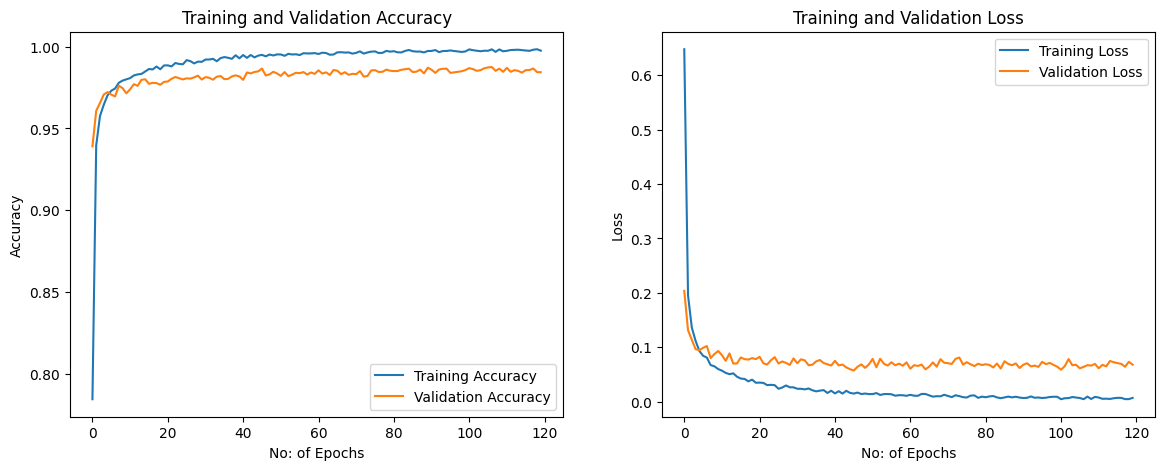

In [ ]:
plt.figure(figsize=(14, 5))

# Training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(trans_history.history['accuracy'], label='Training Accuracy')
plt.plot(trans_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('No: of Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Training and validation loss
plt.subplot(1, 2, 2)
plt.plot(trans_history.history['loss'], label='Training Loss')
plt.plot(trans_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('No: of Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
## Training the model on the entire training data

In [ ]:
trans.fit([x_train_ravel,pos_feed_train],y_train,epochs=120,batch_size = 100)

Epoch 1/120
600/600 [==============================] - 15s 25ms/step - loss: 0.0233 - accuracy: 0.9938
Epoch 2/120
600/600 [==============================] - 15s 26ms/step - loss: 0.0105 - accuracy: 0.9970
Epoch 3/120
600/600 [==============================] - 15s 25ms/step - loss: 0.0079 - accuracy: 0.9976
Epoch 4/120
600/600 [==============================] - 15s 24ms/step - loss: 0.0084 - accuracy: 0.9974
Epoch 5/120
600/600 [==============================] - 15s 25ms/step - loss: 0.0094 - accuracy: 0.9969
Epoch 6/120
600/600 [==============================] - 15s 25ms/step - loss: 0.0097 - accuracy: 0.9969
Epoch 7/120
600/600 [==============================] - 15s 25ms/step - loss: 0.0072 - accuracy: 0.9975
Epoch 8/120
600/600 [==============================] - 15s 25ms/step - loss: 0.0070 - accuracy: 0.9976
Epoch 9/120
600/600 [==============================] - 15s 25ms/step - loss: 0.0074 - accuracy: 0.9975
Epoch 10/120
600/600 [==============================] - 16s 27ms/step - l

In [ ]:
out = trans.evaluate([x_test_ravel,pos_feed_test],y_test)

313/313 [==============================] - 5s 17ms/step - loss: 0.0661 - accuracy: 0.9876


In [ ]:
out[1]

0.9876000285148621

In [ ]:
#Saving the model
from tensorflow.keras.models import load_model, save_model
save_model(trans, 'transformer_model.h5')

<ipython-input-33-f0c69834302e>:3: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(trans, 'transformer_model.h5')


In [ ]:
#Reusing the stored model to predict
custom_objects = {'ClassToken': ClassToken}
transformer = load_model('transformer_model.h5', custom_objects=custom_objects)


out = transformer.evaluate([x_test_ravel,pos_feed_test],y_test)

313/313 [==============================] - 7s 17ms/step - loss: 0.0661 - accuracy: 0.9876


In [ ]:
# Misclassification
pred_labels = np.argmax(transformer.predict([x_test_ravel,pos_feed_test]),axis = 1)

misclassified_sample = np.where(pred_labels != y_test)[0]

print('No: of misclassified sample is: ',len(misclassified_sample))

313/313 [==============================] - 7s 16ms/step
No: of misclassified sample is:  124


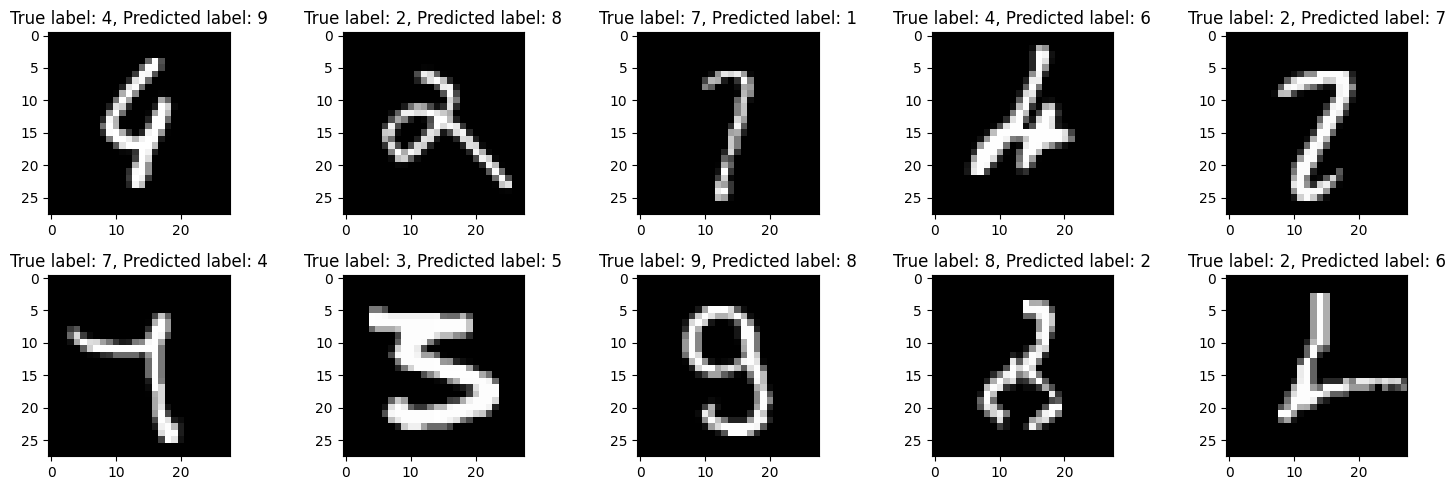

In [ ]:
# plotting some misclassified samples

plt.figure(figsize=(15, 5))
for i, idx in enumerate(misclassified_sample[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f'True label: {y_test[idx]}, Predicted label: {pred_labels[idx]}')
plt.tight_layout()
plt.show()